In [0]:
import pandas as pd
import matplotlib.pyplot as plt


Dataset 1 : Stanford Open Policing Project

In [0]:
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2018-tutorial/master/police.csv'
ri = pd.read_csv(url,error_bad_lines=False)
ri

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [0]:
#check all the column and row number
ri.shape

(91741, 15)

In [0]:
#check all the data types
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [0]:
 ri.isnull().values.any()
 

True

In [0]:
ri.isnull()
#it counts the true as 1 and sum up that .. and find the value

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91737,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91738,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91739,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [0]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
frisk                 88545
stop_datetime             0
drug                  91717
dtype: int64

#Remove the columns that only contain missing values


In [0]:
#approach 1
#ri.drop('county_name',axis='columns',inplace = True)
ri.drop(columns='county_name',axis =1,inplace =True)

In [0]:
#approach 2:
ri.dropna(axis='columns', how = 'all')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


2.DO men or women speed more often?
## New Section
 

In [0]:
 ri[ri.violation == 'Speeding'].driver_gender.value_counts()
 

M    32979
F    15482
Name: driver_gender, dtype: int64

In [0]:
#if we use groupby func to to do so..and if we want to apply condition we need to use .loc[]

ri.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [0]:
ri.groupby(['violation'], as_index=True ).driver_gender.value_counts(normalize=True).loc['Speeding']


driver_gender
M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

## DOES GENDER AFFECT WHO GETS SEARCHED DURING A STOP?

In [0]:
ri.search_conducted.mean()

0.03483720473942948

In [0]:
ri.groupby('driver_gender').search_conducted.count()

driver_gender
F    23511
M    62895
Name: search_conducted, dtype: int64

In [0]:
ri.groupby(['driver_gender','violation']).search_conducted.count()

driver_gender  violation          
F              Equipment               2487
               Moving violation        3204
               Other                    690
               Registration/plates     1013
               Seat belt                635
               Speeding               15482
M              Equipment               8533
               Moving violation       13020
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
               Speeding               32979
Name: search_conducted, dtype: int64

In [0]:
ri.groupby(['violation','driver_gender']).search_conducted.count()

violation            driver_gender
Equipment            F                 2487
                     M                 8533
Moving violation     F                 3204
                     M                13020
Other                F                  690
                     M                 3627
Registration/plates  F                 1013
                     M                 2419
Seat belt            F                  635
                     M                 2317
Speeding             F                15482
                     M                32979
Name: search_conducted, dtype: int64

In [0]:
#.mean gives the percentage of somthing
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## Why is search_type missing so often?

In [0]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [0]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [0]:
ri.search_type.value_counts(dropna= False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

##During a search how often is the driver frisked?

In [0]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [0]:
ri.frisk.value_counts()

False    2922
True      274
Name: frisk, dtype: int64

In [0]:
ri.frisk.sum()

274

In [0]:
ri.frisk.mean()

0.08573216520650813

## which yearn had the least number of stops/

In [0]:
#APPROACH 1

ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [0]:
#approach 2
#we are tyring to convert time and date to datetime object and then we can access the year
combined = ri.stop_date.str.cat(ri.stop_time, sep =' ')
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [0]:
ri['stop_datetime']=pd.to_datetime(combined)
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [0]:
ri.stop_datetime.dt.year

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_datetime, Length: 91741, dtype: int64

In [0]:
ri.stop_datetime.dt.year.value_counts().sort_values(ascending=True)

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

## How does drug activity change by time of day?

In [0]:
ri.drugs_related_stop.mean()

0.008883705213590434

In [0]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.count()

stop_datetime
0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: drugs_related_stop, dtype: int64

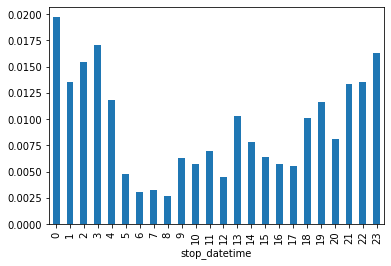

In [0]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot(kind='bar')

In [0]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.count().isnull()

0

In [0]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.agg(['mean', 'count'])


,mean,count
stop_datetime,,
0,0.019728,5221
1,0.013507,4442
2,0.015462,2975
3,0.017065,1172
4,0.011811,254
5,0.004762,210
6,0.003040,3290
7,0.003281,4572
8,0.002687,5210


In [0]:
ri[ri.stop_datetime.dt.hour == 10 ].drugs_related_stop.count()


7350

In [0]:
ri.drugs_related_stop.count()

91741

In [0]:
7350/91741

0.08011685069925115

## Do most stop occur at night?

In [0]:
ri[(ri.stop_datetime.dt.hour) > 4 & (ri.stop_datetime.dt.hour < 22)].shape

(86520, 16)

## Find the bad data in the stop duration column and fix

In [0]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [0]:
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration']='NAN'

In [0]:

ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NAN              2
Name: stop_duration, dtype: int64

In [0]:
import numpy as np
ri.loc[ri.stop_duration == 'NAN', 'stop_duration']=np.nan

In [0]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [0]:
1.simply machine learning is a type of application where that application has the ability the learn itself and improve its performance 
2.YES
2.YES.
3.x =input()
print('HELLO ' +x )

In [1]:
x =input()
print('HELLO ' +x )

hi
HELLOhi
